In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import joblib

# Load the dataset
file_path = "Crop_recommendation.csv"
farm = pd.read_csv(file_path)
farm.sample(15)


,N,P,K,temperature,humidity,ph,rainfall,label
1910,107,45,25,23.086593,83.555461,7.227746,71.840807,cotton
207,59,70,84,17.334868,18.749270,7.550808,82.617347,chickpea
412,31,72,17,28.691805,49.472254,5.833032,96.362229,pigeonpeas
484,22,62,16,34.645541,54.323425,4.828936,180.901000,pigeonpeas
1904,126,38,23,25.362438,83.632761,6.176716,88.436189,cotton
445,23,75,25,31.075090,47.198477,7.077170,91.312564,pigeonpeas
99,65,37,40,23.359054,83.595123,5.333323,188.413665,rice
1260,33,139,203,33.342145,82.510346,5.693287,70.680986,grapes
1863,1,12,30,27.754298,95.946438,5.562224,131.090008,coconut
755,20,68,17,30.118730,60.116808,6.578715,71.729804,blackgram


In [4]:
# Display basic dataset information
print("Dataset Info:\n", farm.info())
print("\nFirst 5 Rows:\n", farm.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
Dataset Info:
 None

First 5 Rows:
     N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628

In [5]:
# Check for missing values
print("\nMissing Values:\n", farm.isnull().sum())




Missing Values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [6]:
# Summary statistics
print("\nSummary Statistics:\n", farm.describe())






Summary Statistics:
                  N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [7]:
farm.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [8]:
# Set Seaborn style
sns.set_style("whitegrid")



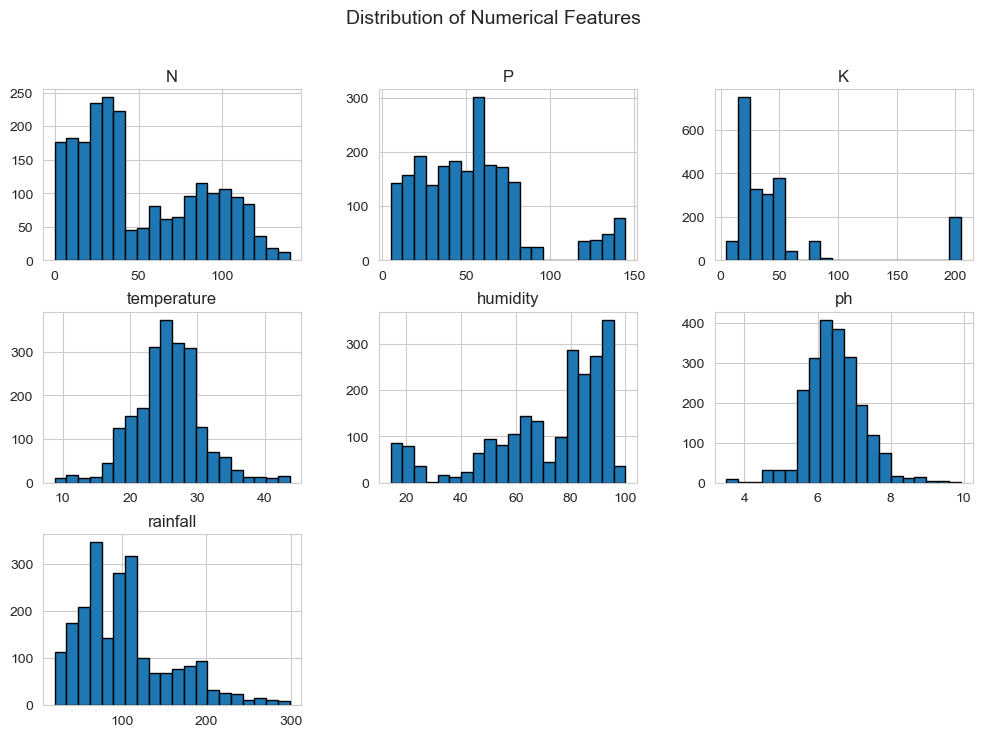

In [9]:
# --- Visualization ---

# 1. Distribution of each numerical column
farm.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()



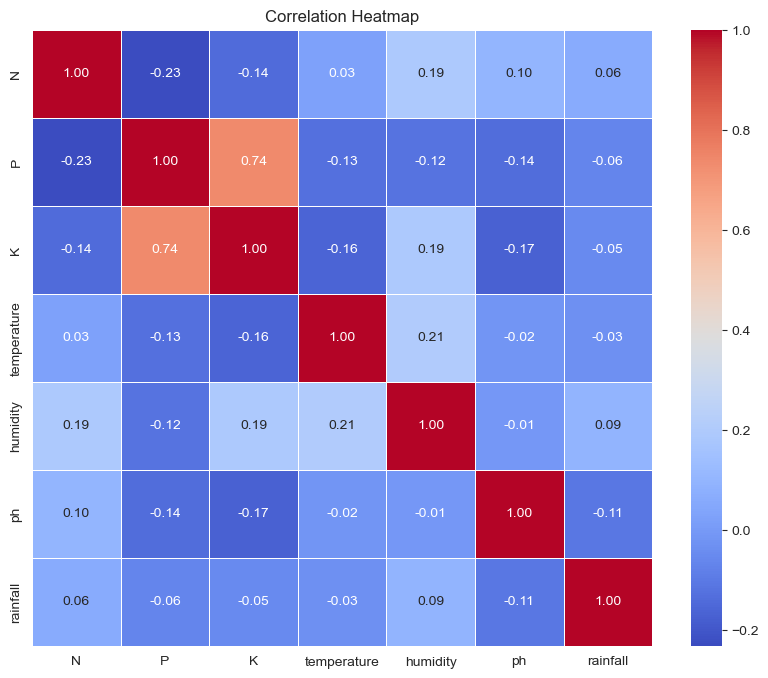

In [10]:
# 2. Correlation heatmap
# Remove non-numeric columns for correlation analysis
numeric_df = farm.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



In [11]:
# Pairplot to visualize relationships
sns.pairplot(farm, hue='label', diag_kind='kde')
plt.legend(title='Crops', bbox_to_anchor=(1.05, 5), loc='upper left')
plt.show()


C:\Users\Krishna-PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=farm.drop(columns=['label']))
plt.xticks(rotation=45)
plt.title('Nutrient Distribution Boxplot')
plt.show()

In [ ]:
# Countplot of different crop labels
plt.figure(figsize=(12, 6))
sns.countplot(y=farm['label'], order=farm['label'].value_counts().index, palette='viridis')
plt.title('Crop Distribution')
plt.xlabel('Count')
plt.ylabel('Crop Type')

plt.show()



In [ ]:
# Scatter plot of key nutrient relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(x=farm['N'], y=farm['P'], hue=farm['label'], palette='deep')
plt.title('Nitrogen vs Phosphorus')
plt.xlabel('Nitrogen')
plt.ylabel('Phosphorus')
plt.legend(title='Crops', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=farm['K'], y=farm['ph'], hue=farm['label'], palette='coolwarm')
plt.title('Potassium vs pH')
plt.xlabel('Potassium')
plt.ylabel('pH Level')
plt.legend(title='Crops', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# Scatter plot of Temperature vs Humidity
plt.figure(figsize=(8, 6))
sns.scatterplot(x=farm['temperature'], y=farm['humidity'], hue=farm['label'], palette='coolwarm')
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.legend(title='Crops', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Scatter plot of Temperature vs Rainfall
plt.figure(figsize=(8, 6))
sns.scatterplot(x=farm['temperature'], y=farm['rainfall'], hue=farm['label'], palette='viridis')
plt.title('Temperature vs Rainfall')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.legend(title='Crops', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Scatter plot of Humidity vs Rainfall
plt.figure(figsize=(8, 6))
sns.scatterplot(x=farm['humidity'], y=farm['rainfall'], hue=farm['label'], palette='plasma')
plt.title('Humidity vs Rainfall')
plt.xlabel('Humidity (%)')
plt.ylabel('Rainfall (mm)')
plt.legend(title='Crops', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Bar plot comparing average temperature, humidity, and rainfall by crop label
avg_values = farm.groupby('label')[['temperature', 'humidity', 'rainfall']].mean().reset_index()
plt.figure(figsize=(12, 6))
melted_avg = avg_values.melt(id_vars='label', var_name='Factor', value_name='Value')
sns.barplot(x='label', y='Value', hue='Factor', data=melted_avg, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Comparison of Temperature, Humidity, and Rainfall by Crop')
plt.xlabel('Crop Label')
plt.ylabel('Average Value')
plt.legend(title='Factor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Boxplot to compare temperature distribution among different crops
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='temperature', data=farm, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Temperature Distribution Across Different Crops')
plt.xlabel('Crop Label')
plt.ylabel('Temperature (°C)')
plt.show()

In [ ]:
# Boxplot to compare humidity distribution among different crops
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='humidity', data=farm, palette='viridis')
plt.xticks(rotation=90)
plt.title('Humidity Distribution Across Different Crops')
plt.xlabel('Crop Label')
plt.ylabel('Humidity (%)')
plt.show()

In [ ]:
# Boxplot to compare rainfall distribution among different crops
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='rainfall', data=farm, palette='plasma')
plt.xticks(rotation=90)
plt.title('Rainfall Distribution Across Different Crops')
plt.xlabel('Crop Label')
plt.ylabel('Rainfall (mm)')
plt.show()

NameError: name 'python_version' is not defined

In [18]:
from platform import python_version

print(python_version())

3.11.5
